In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
N = 4096 #36864
dx = 3900 / 36864. #3900. / N

In [ ]:
""" How it is written """
with open("data_250_seeds.pkl", "wb") as fp:
    pickle.dump({"x": db_x, "intensity": db}, fp)

In [4]:
with open("data_250_seeds_36_3f.pkl", "rb") as fp:
    data_mean_numer = pickle.load(fp)

In [62]:
data_mean_numer.keys()

dict_keys(['size', 'x', 'intensity'])

In [9]:
with open("data_collection_250_seeds_36864.pkl", "wb") as fp:
    pickle.dump({"x": db_x, "y": db, "theor_mean": db_an, \
                "numer_mean": data_mean_numer["intensity"], \
                "total_count": data_mean_numer["size"]}, fp)

In [8]:
""" How to load it """
with open("data_250_seeds_36.pkl", "rb") as fp:
    data_curr = pickle.load(fp)

print(data_curr.keys())
db_x = data_curr["x"]
db = data_curr["y"]
db_an = data_curr["an"]
# print info
[[k, data_curr[k].keys()] for k in list(data_curr.keys())]

dict_keys(['y', 'x', 'an'])


[['y', dict_keys([56, 28, 84, 112])],
 ['x', dict_keys([56, 28, 84, 112])],
 ['an', dict_keys([56, 28, 84, 112])]]

In [58]:
db_x

{3.5: [array([0.00000000e+00, 4.23528844e-05, 9.56720174e-05, 1.62796842e-04,
         2.47302007e-04, 3.53687728e-04, 4.87619442e-04, 6.56229514e-04,
         8.68497061e-04, 1.13572612e-03, 1.47214765e-03, 1.89567734e-03,
         2.42886973e-03, 3.10011933e-03, 3.94517267e-03, 5.00903200e-03,
         6.34835182e-03, 8.03445591e-03, 1.01571356e-02, 1.28294316e-02,
         1.61936536e-02, 2.04289589e-02, 2.57608936e-02, 3.24734029e-02,
         4.09239532e-02, 5.15625678e-02, 6.49557928e-02, 8.18168674e-02,
         1.03043707e-01, 1.29766720e-01, 1.63409007e-01, 2.05762146e-01,
         2.59081599e-01, 3.26206826e-01, 4.10712498e-01, 5.17098857e-01,
         6.51031375e-01, 8.19642458e-01, 1.03191128e+00, 1.29914194e+00,
         1.63556549e+00, 2.05909772e+00, 2.59229332e+00, 3.26354693e+00,
         4.10860534e+00, 5.17247106e+00, 6.51179892e+00, 8.19791312e+00,
         1.03206056e+01, 1.29929176e+01, 1.63571597e+06]),
  array([0.00000000e+00, 4.04134650e-05, 9.12910132e-05, 1.5

In [175]:
""" For each z coordinate [3.5, 7.0, 14.0, 21.0, 28.0] we have set of circles.
    Each circle can be characterized by its histogram: 
    bins (n+1 values) and y-values (n values).
    
    For example, we extract central disk histogram for 3.5 km.
"""
xd = db_x[3.5][0]
yd = db[3.5][0]
print(xd.shape, "xd size")
print(yd.shape, "yd size")
print(db_an[3.5])

(51,) xd size
(50,) yd size
[array(0.01635716), array(0.01560813), array(0.01425628), array(0.01240698), array(0.01034635), array(0.00825961), array(0.00633325), array(0.00465464), array(0.00332346), array(0.00228798), array(0.00153801)]


In [172]:
xd, yd

(array([0.00000000e+00, 4.23528844e-05, 9.56720174e-05, 1.62796842e-04,
        2.47302007e-04, 3.53687728e-04, 4.87619442e-04, 6.56229514e-04,
        8.68497061e-04, 1.13572612e-03, 1.47214765e-03, 1.89567734e-03,
        2.42886973e-03, 3.10011933e-03, 3.94517267e-03, 5.00903200e-03,
        6.34835182e-03, 8.03445591e-03, 1.01571356e-02, 1.28294316e-02,
        1.61936536e-02, 2.04289589e-02, 2.57608936e-02, 3.24734029e-02,
        4.09239532e-02, 5.15625678e-02, 6.49557928e-02, 8.18168674e-02,
        1.03043707e-01, 1.29766720e-01, 1.63409007e-01, 2.05762146e-01,
        2.59081599e-01, 3.26206826e-01, 4.10712498e-01, 5.17098857e-01,
        6.51031375e-01, 8.19642458e-01, 1.03191128e+00, 1.29914194e+00,
        1.63556549e+00, 2.05909772e+00, 2.59229332e+00, 3.26354693e+00,
        4.10860534e+00, 5.17247106e+00, 6.51179892e+00, 8.19791312e+00,
        1.03206056e+01, 1.29929176e+01, 1.63571597e+01]),
 array([  77.,   80.,  106.,  114.,  167.,  244.,  347.,  375.,  407.,
       

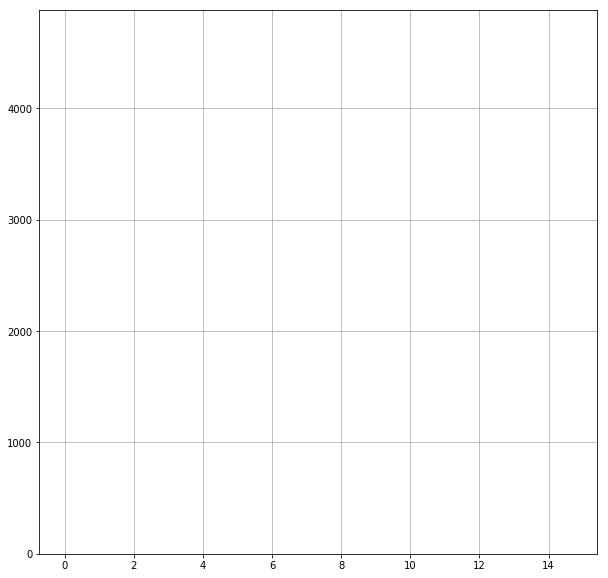

In [171]:
plt.figure(figsize=(10, 10))
plt.bar((xd[1:] + xd[:-1]) / 2, yd, width=xd[1]-xd[0])
plt.grid()

In [15]:
"""
    Here we will extract values of boarders of circles. 
    For this goal we need files with analytical data
"""


def take_half(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    # half-width
    data = data[data[:,1] > 0.5 * data[0,1], 0][-1]
    return data

# imagine, d = 3.5 km
d = 3.5
half_curr = take_half(d)
# boarders of circles
rads = np.array([n * half_curr / 5 for n in range(9)])
rads = rads[rads < 819.2]
print("rads, cm", [str(k) for k in rads])
print("len of rads", len(rads))
print("number of circles, db", len(db[3.5]))

rads, cm ['0.0', '1.2', '2.4', '3.6', '4.8', '6.0', '7.2', '8.4', '9.6']
len of rads 9
number of circles, db 8


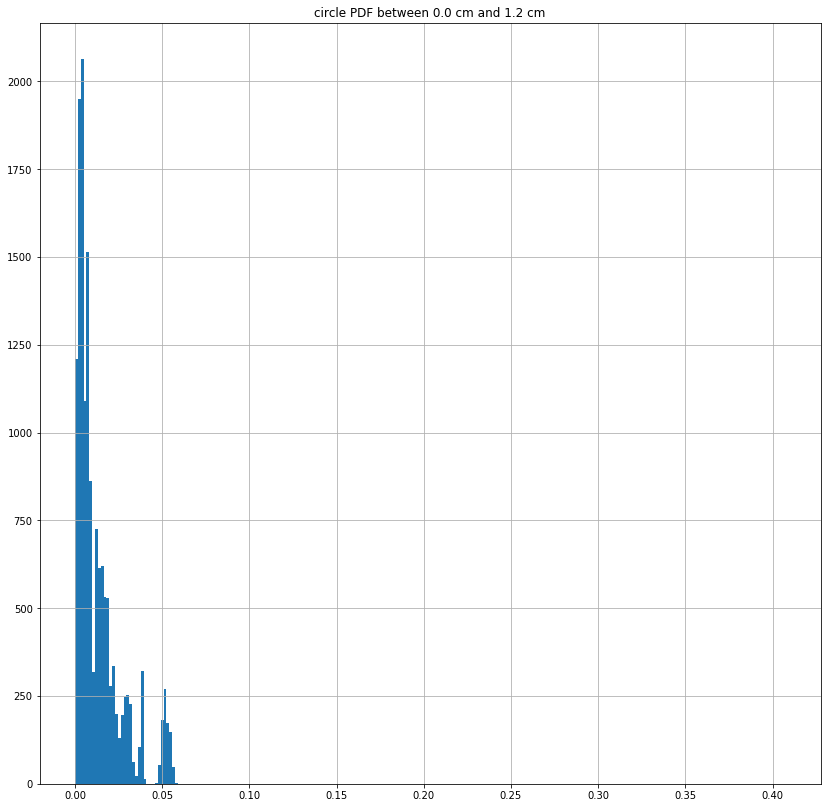

In [20]:
""" Finally, we have """
xd = db_x[3.5][0]
yd = db[3.5][0]

plt.figure(figsize=(14, 14))
plt.bar((xd[1:]+xd[:-1])/2, yd, width=xd[1]-xd[0])
plt.title("circle PDF between " + str(rads[0]) + " cm and " + str(rads[1]) + " cm")

plt.grid()

In [27]:
half_curr / dx

60.0

In [28]:
def take_half(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    # half-width
    data = data[data[:,1] > 0.5 * data[0,1], 0][-1]
    return data

def take_an_data(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    return data

def find_mean(d, db_x, db):
    list_means = []
    for e0,elem in enumerate(db[d]):
        aggreg = np.sum((db_x[d][e0][1:] + db_x[d][e0][:-1]) * db[d][e0] / 2) / np.sum(db[d][e0])
        list_means.append(aggreg)
    return np.array(list_means)

In [35]:
d_curr = 28.
mean3p5 = find_mean(d_curr, db_x, db)
an3p5 = take_an_data(d_curr)

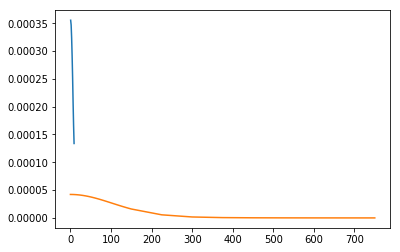

In [36]:
plt.plot((rads[1:]+rads[:-1]) / 2, mean3p5)
plt.plot(an3p5[:,0], an3p5[:,1])

In [152]:
data_num_16

{'intensity': {7: [array(0.00343308),
   array(0.00262592),
   array(0.00222262),
   array(0.00200948),
   array(0.00165323),
   array(0.00123186),
   array(0.00096359),
   array(0.00069846),
   array(0.0004715)],
  28: [array(4.6285186e-05),
   array(4.2325547e-05),
   array(3.81237315e-05),
   array(3.22854472e-05),
   array(2.70000473e-05),
   array(2.02574953e-05),
   array(1.45795546e-05),
   array(1.04366988e-05),
   array(7.35794427e-06)]},
 'x': {7: [0.0,
   array(4.5),
   array(7.5),
   array(10.5),
   array(13.5),
   array(16.5),
   array(19.5),
   array(22.5),
   array(25.5)],
  28: [0.0,
   array(36.),
   array(60.),
   array(84.),
   array(108.),
   array(132.),
   array(156.),
   array(180.),
   array(204.)]}}

In [164]:
##################################################
with open("data_50_seeds_16.pkl", "rb") as fp:
    data_num_16 = pickle.load(fp)
with open("data_100_seeds_8.pkl", "rb") as fp:
    data_num_8 = pickle.load(fp)
with open("data_20_seeds_36.pkl", "rb") as fp:
    data_num = pickle.load(fp)
with open("data_add.pkl", "rb") as fp:
    data_num_add = pickle.load(fp)
#with open("prepared_data.pkl", "rb") as fp:
#    data_num = pickle.load(fp)

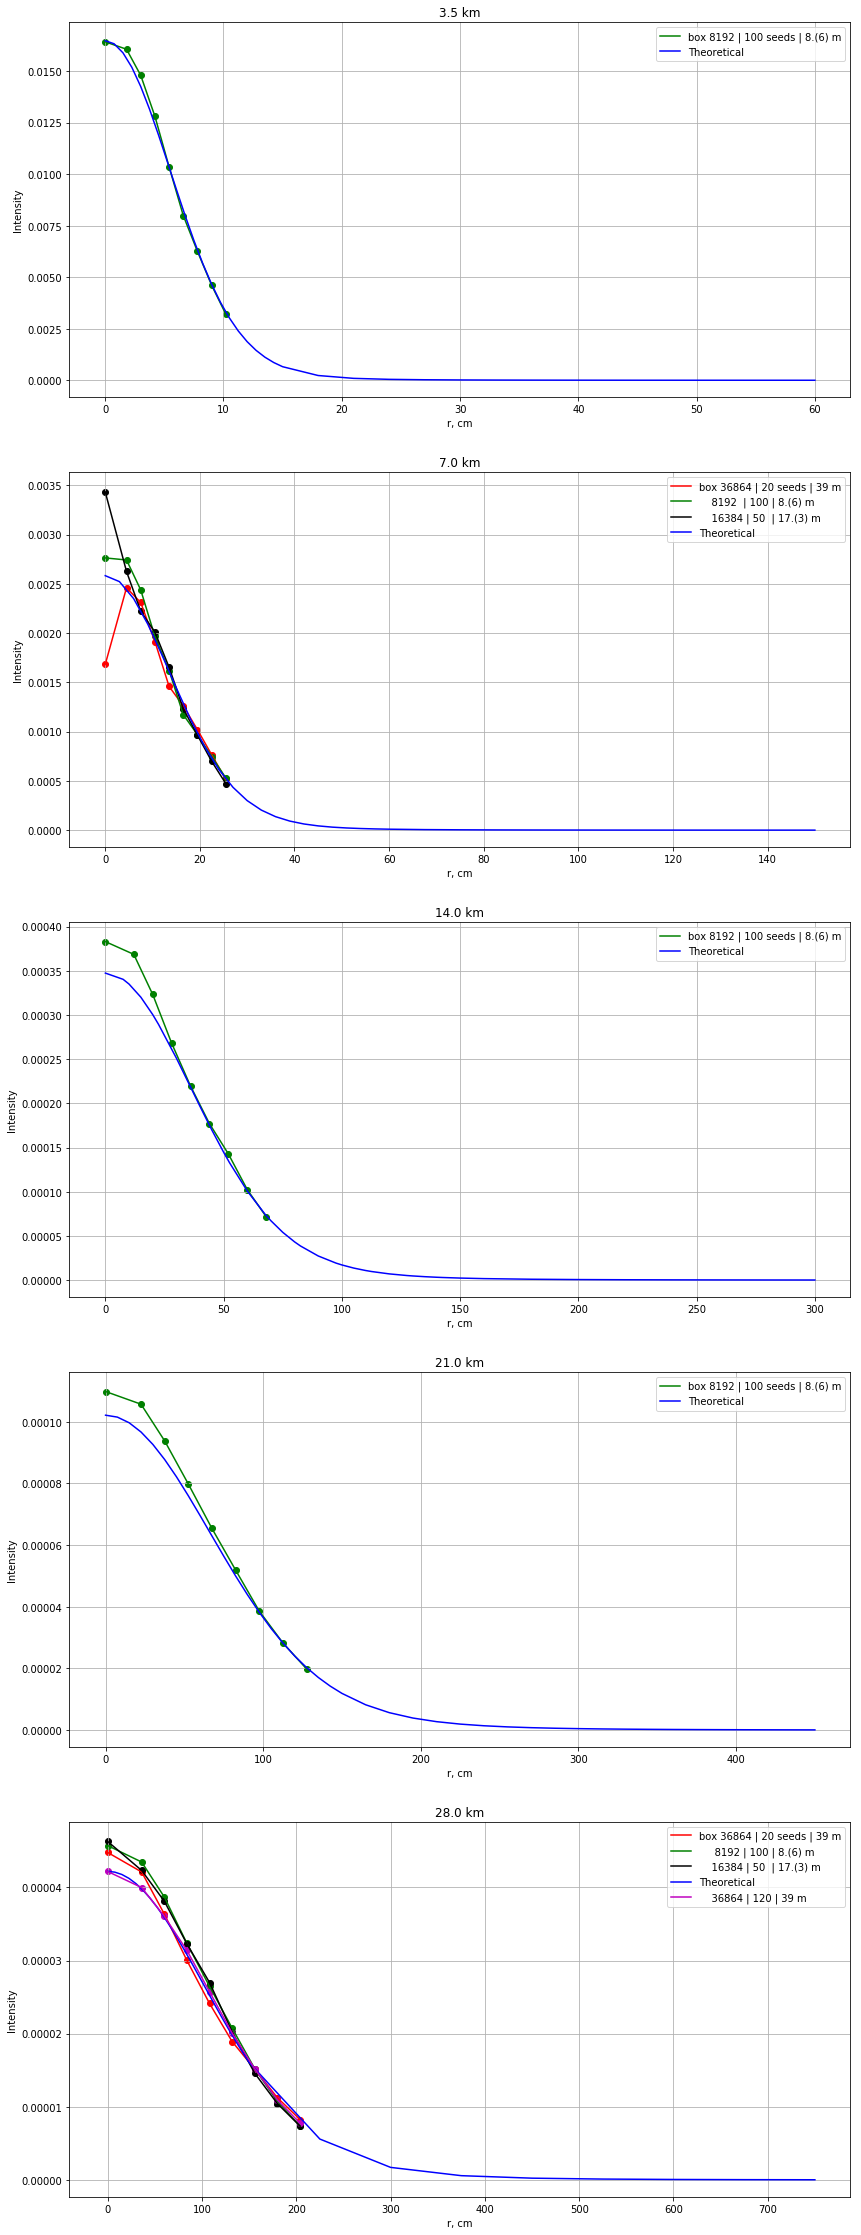

In [168]:
""" convergence """
def take_half(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    #path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    return data

dx = 3900. / 36864

path_conv = "/home/alex/TP/hse_data/convergence/"
#path_aux = "/home/alex/TP/octave_an/data/old/an_data"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

dists = [3.5, 7.0, 14.0, 21.0, 28.0]
#[28, 56, 84, 112] #[3.5, 7.0, 14.0, 21.0, 28.0] #[28, 56, 84, 112]
sbplts = [511, 512, 513, 514, 515] #[511, 512, 513, 514, 515]
plt.figure(figsize=(14, 40))
for d0,d in enumerate(dists):
    data_theor = take_half(d)
    th_x = data_theor[:,0]
    th_y = data_theor[:,1]
    
    plt.subplot(sbplts[d0])
    #data_theor = [[float(s) for s in k.strip().split(" ")] \
    #              for k in data_theor]
    #th_x, th_y = np.array([s[0] for s in data_theor]), \
    #                    np.array([s[1] for s in data_theor])
    if (d == 7 or d == 28):
        data_num["x"][d][0] = 0.
        plt.plot(np.stack(data_num["x"][d]), \
                 np.stack(data_num["intensity"][d]), c="r")
        plt.scatter(np.stack(data_num["x"][d]), \
                    np.stack(data_num["intensity"][d]), c="r")
    ######################
    data_num_8["x"][float(d)][0] = 0.
    plt.plot(np.stack(data_num_8["x"][float(d)]), \
             np.stack(data_num_8["intensity"][float(d)]), c="g")
    plt.scatter(np.stack(data_num_8["x"][float(d)]), \
                np.stack(data_num_8["intensity"][float(d)]), c="g")
    ######################
    if (d == 7 or d == 28):
        data_num_16["x"][d][0] = 0.
        plt.plot(np.stack(data_num_16["x"][d]), \
                 np.stack(data_num_16["intensity"][d]), c="k")
        plt.scatter(np.stack(data_num_16["x"][d]), \
                    np.stack(data_num_16["intensity"][d]), c="k")    
    
    plt.plot(th_x, th_y, c="b")
    
    if d0 != len(dists) - 1:
        if d == 7 or d == 28:
            plt.legend(["box 36864 | 20 seeds | 39 m", \
                        "    8192  | 100 | 8.(6) m", \
                        "    16384 | 50  | 17.(3) m",\
                "Theoretical"])    
        else:
            plt.legend(["box 8192 | 100 seeds | 8.(6) m", \
                "Theoretical"])
    else:
        data_num_add["x"][d][0] = 0.
        plt.plot(np.stack(data_num_add["x"][d]), \
                 np.stack(data_num_add["intensity"][d]), c="m")
        plt.scatter(np.stack(data_num_add["x"][d]), \
                    np.stack(data_num_add["intensity"][d]), c="m")    
        plt.legend(["box 36864 | 20 seeds | 39 m", \
                    "     8192 | 100 | 8.(6) m", \
                    "    16384 | 50  | 17.(3) m", \
                "Theoretical", \
                    "    36864 | 120 | 39 m"])
        
    plt.grid()
    plt.xlabel("r, cm")
    plt.ylabel("Intensity")
    plt.title(str(d) + " km")
    #plt.show()
        
plt.savefig("/home/alex/TP/convergence_few_resolutions.png")

In [143]:
data_num_8['x'].keys(), data_num_8['intensity'].keys()

(dict_keys([3.5, 28.0, 21.0, 14.0, 7.0]),
 dict_keys([3.5, 28.0, 21.0, 14.0, 7.0]))

In [104]:
data_num_8["x"][d], \
data_num_8["intensity"][d]

([0.0, array([0.00000000e+00, 2.43634542e-05, 4.87269084e-05, 7.30903625e-05,
         9.74538167e-05, 1.21817271e-04, 1.46180725e-04, 1.70544179e-04,
         1.94907633e-04, 2.19271088e-04, 2.43634542e-04, 2.67997996e-04,
         2.92361450e-04, 3.16724904e-04, 3.41088359e-04, 3.65451813e-04,
         3.89815267e-04, 4.14178721e-04, 4.38542175e-04, 4.62905629e-04,
         4.87269084e-04, 5.11632538e-04, 5.35995992e-04, 5.60359446e-04,
         5.84722900e-04, 6.09086355e-04, 6.33449809e-04, 6.57813263e-04,
         6.82176717e-04, 7.06540171e-04, 7.30903625e-04, 7.55267080e-04,
         7.79630534e-04, 8.03993988e-04, 8.28357442e-04, 8.52720896e-04,
         8.77084351e-04, 9.01447805e-04, 9.25811259e-04, 9.50174713e-04,
         9.74538167e-04, 9.98901621e-04, 1.02326508e-03, 1.04762853e-03,
         1.07199198e-03, 1.09635544e-03, 1.12071889e-03, 1.14508235e-03,
         1.16944580e-03, 1.19380925e-03, 1.21817271e-03, 1.24253616e-03,
         1.26689962e-03, 1.29126307e-03, 1.315

In [110]:
[k.shape for k in data_num_8["x"][d][1:]]

[(250,), (250,), (250,), (250,), (250,), (250,), (250,)]

In [111]:
[k.shape for k in data_num_8["intensity"][d][1:]]

[(249,), (249,), (249,), (249,), (249,), (249,), (249,)]

In [116]:
np.vstack(data_num_8["x"][d]).shape

(8, 250)

In [129]:
""" convergence """
def take_half(curr_dist):
    # path to analytical curves
    path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    #path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    return data

dx = 3900. / 36864

path_conv = "/home/alex/TP/hse_data/convergence/"
#path_aux = "/home/alex/TP/octave_an/data/old/an_data"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

dists = [3.5, 7.0, 14.0, 21.0, 28.0]
#[28, 56, 84, 112] #[3.5, 7.0, 14.0, 21.0, 28.0] #[28, 56, 84, 112]
sbplts = [511, 512, 513, 514, 515] #[511, 512, 513, 514, 515]
plt.figure(figsize=(14, 40))
for d0,d in enumerate(dists):
    data_theor = take_half(d)
    th_x = data_theor[:,0]
    th_y = data_theor[:,1]
    
    plt.subplot(sbplts[d0])
    #data_theor = [[float(s) for s in k.strip().split(" ")] \
    #              for k in data_theor]
    #th_x, th_y = np.array([s[0] for s in data_theor]), \
    #                    np.array([s[1] for s in data_theor])
    if (d == 7 or d == 28):
        data_num["x"][d][0] = 0.
        plt.plot(np.stack(data_num["x"][d]), \
                 np.stack(data_num["intensity"][d]), c="r")
        plt.scatter(np.stack(data_num["x"][d]), \
                    np.stack(data_num["intensity"][d]), c="r")
    ######################
    data_num_8["x"][float(d)][0] = 0.
    plt.plot(np.stack(data_num_8["x"][float(d)]), \
             np.stack(data_num_8["intensity"][float(d)]), c="g")
    plt.scatter(np.stack(data_num_8["x"][float(d)]), \
                np.stack(data_num_8["intensity"][float(d)]), c="g")
    ######################
    if (d == 7 or d == 28):
        data_num_16["x"][d][0] = 0.
        plt.plot(np.stack(data_num_16["x"][d]), \
                 np.stack(data_num_16["intensity"][d]), c="k")
        plt.scatter(np.stack(data_num_16["x"][d]), \
                    np.stack(data_num_16["intensity"][d]), c="k")    
    
    plt.plot(th_x, th_y, c="b")
    
    if d0 != len(dists) - 1:
        if d == 7 or d == 28:
            plt.legend(["box 36864 | 20 seeds | 39 m", \
                        "    8192  | 100 | 8.(6) m", \
                        "    16384 | 50  | 17.(3) m",\
                "Theoretical"])    
        else:
            plt.legend(["box 8192 | 100 seeds | 8.(6) m", \
                "Theoretical"])
    else:
        data_num_add["x"][d][0] = 0.
        plt.plot(np.stack(data_num_add["x"][d]), \
                 np.stack(data_num_add["intensity"][d]), c="m")
        plt.scatter(np.stack(data_num_add["x"][d]), \
                    np.stack(data_num_add["intensity"][d]), c="m")    
        plt.legend(["box 36864 | 20 seeds | 39 m", \
                    "     8192 | 100 | 8.(6) m", \
                    "    16384 | 50  | 17.(3) m", \
                "Theoretical", \
                    "    36864 | 120 | 39 m"])
        
    plt.grid()
    plt.xlabel("r, cm")
    plt.ylabel("Intensity")
    plt.title(str(d) + " km")
    #plt.show()
        
plt.savefig("/home/alex/TP/convergence_long_dist.png")

{'intensity': {28: [array([5.27829000e+04, 3.93474833e+04, 3.16598083e+04, 2.60943833e+04,
          2.18183167e+04, 1.84882333e+04, 1.57787083e+04, 1.35961333e+04,
          1.18014083e+04, 1.03139250e+04, 9.03526667e+03, 7.99880000e+03,
          7.09477500e+03, 6.31558333e+03, 5.65161667e+03, 5.07000833e+03,
          4.57266667e+03, 4.12362500e+03, 3.74362500e+03, 3.40080000e+03,
          3.10159167e+03, 2.81968333e+03, 2.58345833e+03, 2.36878333e+03,
          2.16948333e+03, 1.99787500e+03, 1.83357500e+03, 1.70101667e+03,
          1.56730000e+03, 1.45360833e+03, 1.34593333e+03, 1.25255000e+03,
          1.15900833e+03, 1.08155833e+03, 1.00380833e+03, 9.39258333e+02,
          8.71975000e+02, 8.16200000e+02, 7.59700000e+02, 7.12933333e+02,
          6.70041667e+02, 6.26983333e+02, 5.88358333e+02, 5.51841667e+02,
          5.18191667e+02, 4.88433333e+02, 4.60466667e+02, 4.37208333e+02,
          4.07916667e+02, 3.86125000e+02, 3.65575000e+02, 3.45341667e+02,
          3.27475000e

In [1]:
######################################################################################################

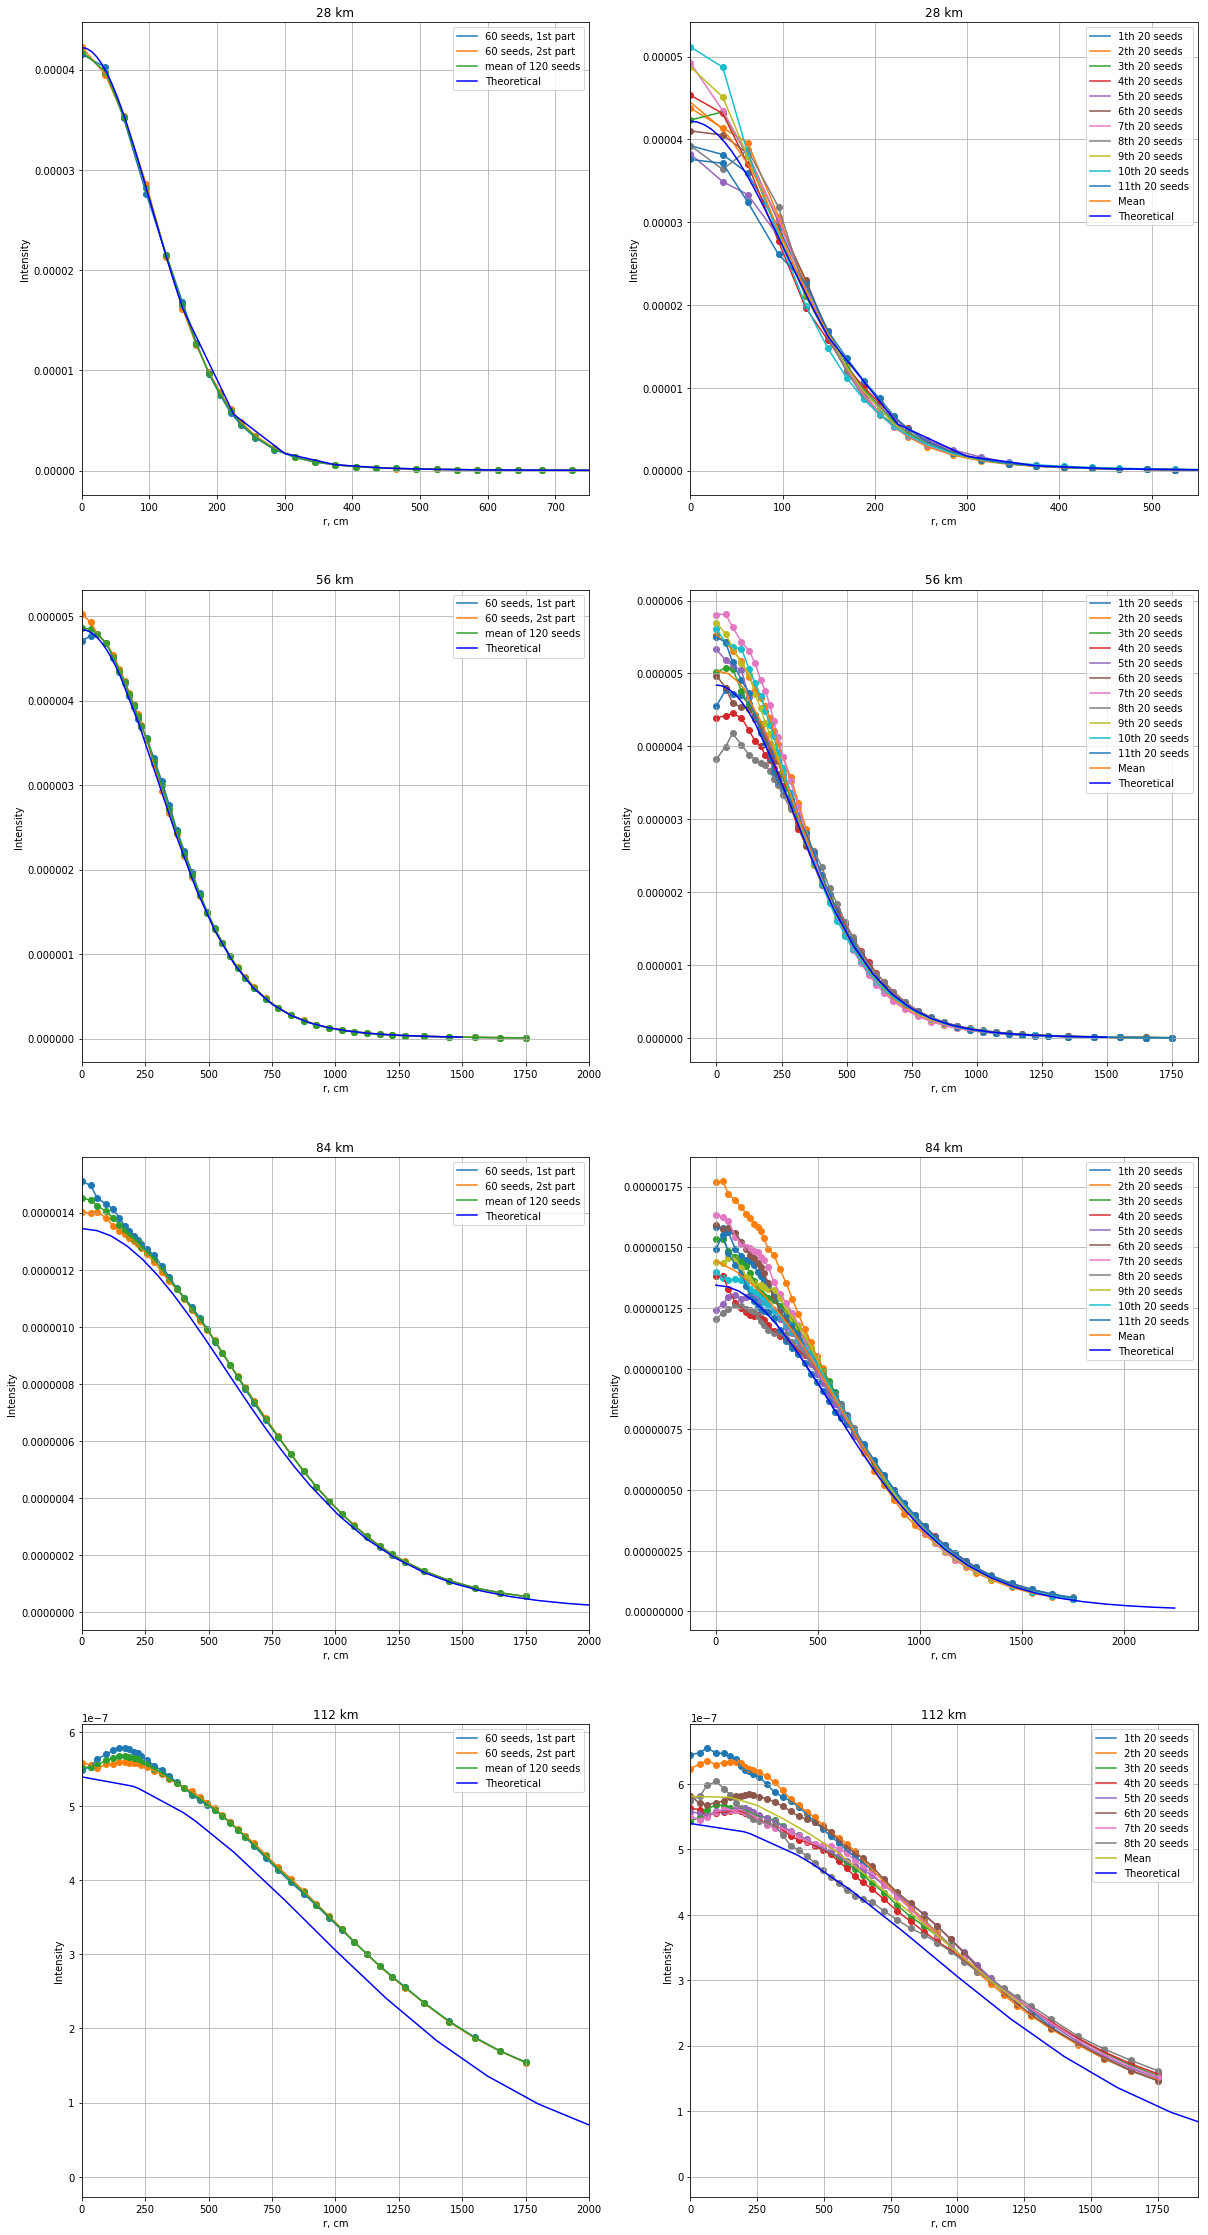

In [10]:
""" convergence """
path_conv = "/home/alex/TP/hse_data/convergence/"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

dists = [28, 56, 84, 112]
sbplts = [421, 422, 423, 424, 425, 426, 427, 428]
plt.figure(figsize=(20, 40))
for d0,d in enumerate(dists):
    with open(os.path.join(path_aux, \
                "gammaRlist"+str(d)+"p00.dat"), "r") as f:
        data_theor = f.readlines()[1:]

    plt.subplot(sbplts[2*d0])
    data_theor = [[float(s) for s in k.strip().split(" ")] \
                  for k in data_theor]
    th_x, th_y = np.array([s[0] for s in data_theor]), \
                        np.array([s[1] for s in data_theor])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)
        
    with open(os.path.join(path_conv, str(d)+"_60_1"), "rb") \
            as f_conv:
        ens601 = pickle.load(f_conv)
    ens601[0][0] = 0
    #if d0==0:
    #    ens601[1][0] *= 1.12
    #elif d0==3:
    #    ens601[1][0] *= 0.98
    plt.plot(ens601[0]*dx, ens601[1])
    plt.scatter(ens601[0]*dx, ens601[1])
    
    with open(os.path.join(path_conv, str(d)+"_60_2"), "rb") \
            as f_conv:
        ens60 = pickle.load(f_conv)
    ens60[0][0] = 0
    #if d0==0:
    #    ens60[1][0] *= 1.12
    #elif d0==3:
    #    ens60[1][0] *= 0.98
    #ens60[1][1] *= 1.1
    plt.plot(ens60[0]*dx, ens60[1])
    plt.scatter(ens60[0]*dx, ens60[1])
    
    with open(os.path.join(path_conv, str(d)), "rb") as f_conv:
        ens120 = pickle.load(f_conv)
    ens120[0][0] = 0
    plt.plot(ens120[0]*dx, ens120[1])#0.5*(ens60[1]+ens601[1]))
    plt.scatter(ens120[0]*dx, ens120[1])#0.5*(ens60[1]+ens601[1]))
        
    plt.plot(th_x, th_y, c="b")
    plt.legend(["60 seeds, 1st part", "60 seeds, 2st part", \
               "mean of 120 seeds", "Theoretical"])    
    #else:    
    #    plt.legend(["Theoretical", "60 seeds, 1st part", "60 seeds, 2st part", \
    #               "mean of 120 seeds", "10 seeds"])
    if d0 == 0:
        plt.xlim(0, 750)
    else:
        plt.xlim(0, 2000)
    plt.grid()
    plt.xlabel("r, cm")
    plt.ylabel("Intensity")
    plt.title(str(d) + " km")
    #plt.show()
    
    plt.subplot(sbplts[2*d0+1])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)
    count_c = 0
    m = 0
    for n in range(13):
        #arr = np.load("/home/alex/TP/hse_data/convergence/"+\
        #             str(d)+"_20_"+str(n))
        if m < 2:
            m += 1
            continue
        try:
            with open("/home/alex/TP/hse_data/convergence/"+\
                         str(d)+"_20_"+str(n), "rb") \
                            as f_conv:
                ens10 = pickle.load(f_conv)
        except:
            continue
        count_c += 1
        ens10[0][0] = 0
        plt.plot(ens10[0]*dx, ens10[1])
        plt.scatter(ens10[0]*dx, ens10[1])

    data_mean_numer["x"][d][0] = 0
    plt.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])

        
    plt.plot(th_x, th_y, c='b')
    plt.legend([str(b)+"th 20 seeds" for b in range(1,count_c+1)] + ["Mean", "Theoretical"])
    if d0==0:
        plt.xlim(0, 550)
    elif d0==3:
        plt.xlim(0, 1900)
    plt.xlabel("r, cm")
    plt.ylabel("Intensity")
    plt.title(str(d) + " km")
    plt.grid()
    
plt.savefig("/home/alex/TP/convergence_all_20.png")

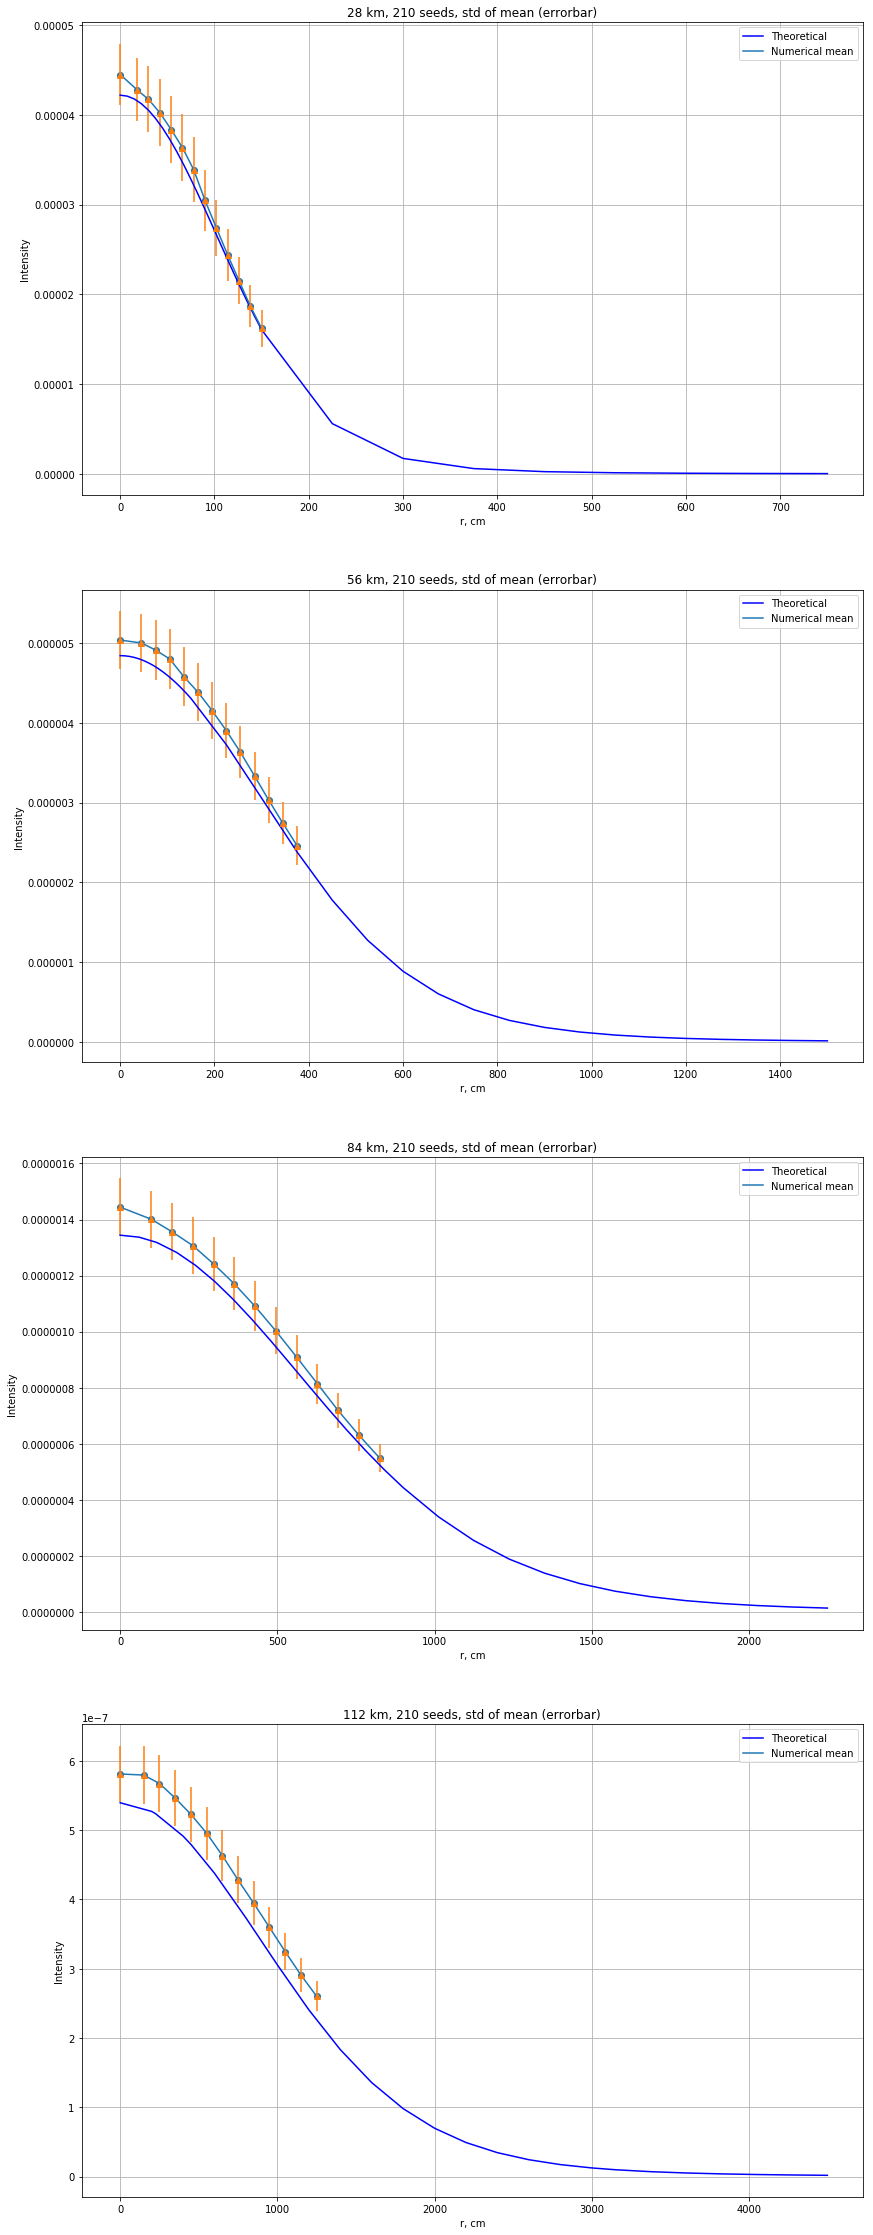

In [6]:
""" convergence """
def take_half(curr_dist):
    # path to analytical curves
    #path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    return data

dx = 3900. / 36864

path_conv = "/home/alex/TP/hse_data/convergence/"
#path_aux = "/home/alex/TP/octave_an/data/old/an_data"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

dists = [28, 56, 84, 112]#[3.5, 7.0, 14.0, 21.0, 28.0]
#[28, 56, 84, 112] #[3.5, 7.0, 14.0, 21.0, 28.0] #[28, 56, 84, 112]
sbplts = [411, 412, 413, 414] #[511, 512, 513, 514, 515]
plt.figure(figsize=(14, 40))
for d0,d in enumerate(dists):
    data_theor = take_half(d)
    th_x = data_theor[:,0]
    th_y = data_theor[:,1]
    
    plt.subplot(sbplts[d0])
    
    plt.plot(th_x, th_y, c="b")
    
    plt.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
    plt.scatter(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
    
    plt.errorbar(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d], \
                 np.array(data_mean_numer["std"][d])/np.sqrt(210.), linestyle='None', marker='^')
    
    plt.legend(["Theoretical", "Numerical mean"])
    plt.grid()
    plt.xlabel("r, cm")
    plt.ylabel("Intensity")
    plt.title(str(d) + " km, 210 seeds, std of mean (errorbar)")
    #plt.show()
        
#plt.savefig("/home/alex/TP/convergence_few_resolutions.png")

In [6]:
data_mean_numer.keys()

dict_keys(['x', 'size', 'intensity'])

In [25]:
np.array(data_mean_numer["x"][d])

array([  50.,  150.,  250.,  350.,  450.,  550.,  650.,  750.,  850.,
        950., 1050., 1150., 1250.])

In [26]:
np.array(data_mean_numer["intensity"][d])

array([5.81049063e-07, 5.79454131e-07, 5.67251410e-07, 5.46272910e-07,
       5.22677536e-07, 4.95642271e-07, 4.63256392e-07, 4.28051862e-07,
       3.94312968e-07, 3.59569157e-07, 3.24647519e-07, 2.90948347e-07,
       2.60217070e-07])

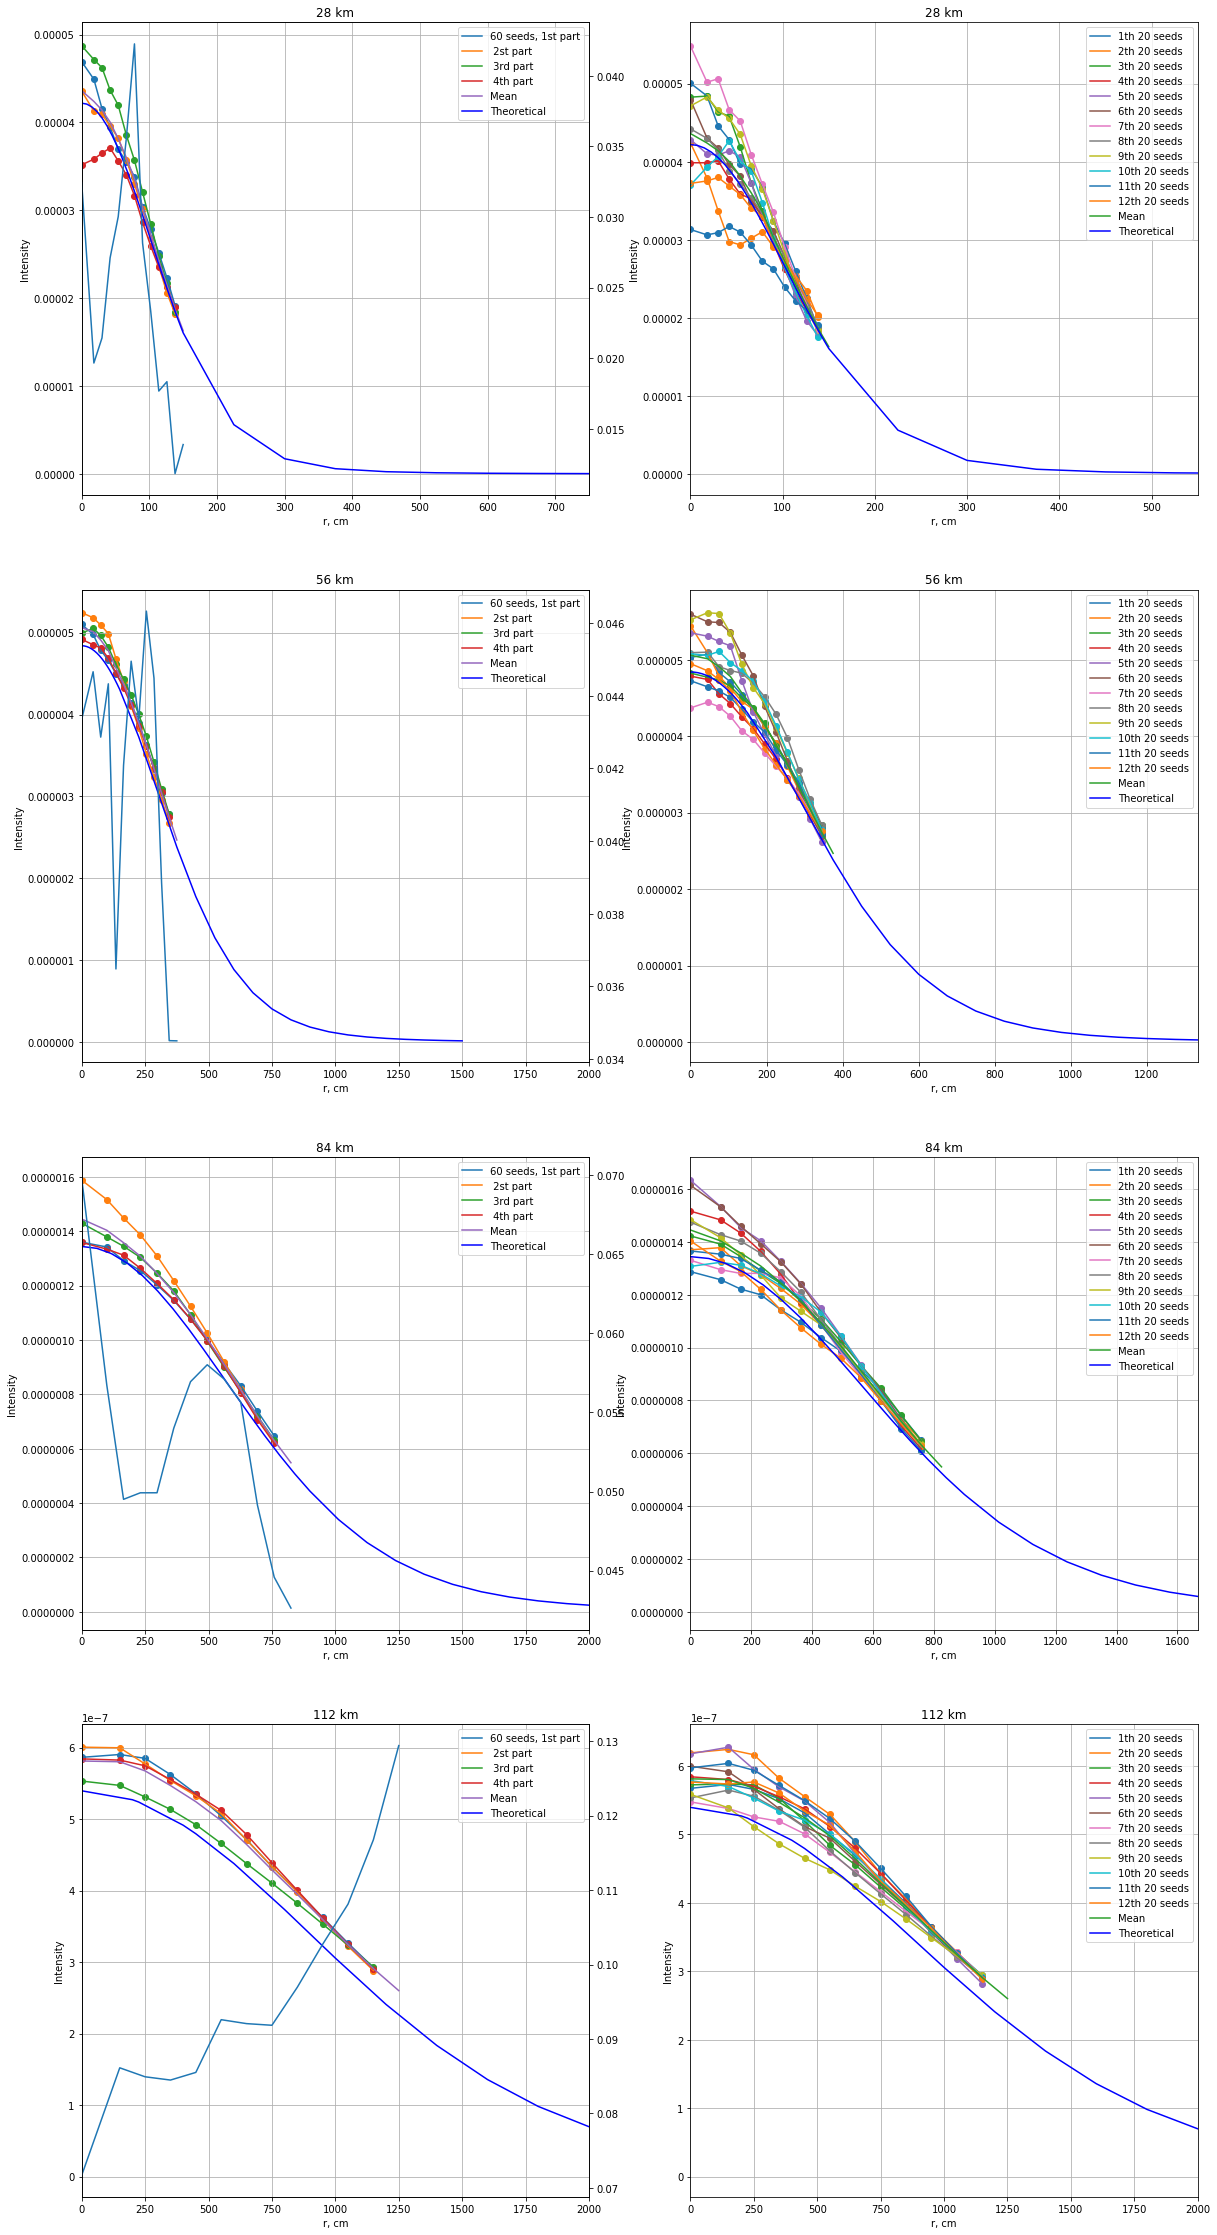

In [31]:
""" convergence """
path_conv = "/home/alex/TP/hse_data/convergence/"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

with open("/home/alex/TP/comet_data/conv_20_60.pkl", "rb") as f:
    conv_d = pickle.load(f)

dists = [28, 56, 84, 112]
sbplts = [421, 422, 423, 424, 425, 426, 427, 428]
fig = plt.figure(figsize=(20, 40))
for d0,d in enumerate(dists):
    with open(os.path.join(path_aux, \
                "gammaRlist"+str(d)+"p00.dat"), "r") as f:
        data_theor = f.readlines()[1:]

    ax = fig.add_subplot(sbplts[2*d0])
    data_theor = [[float(s) for s in k.strip().split(" ")] \
                  for k in data_theor]
    th_x, th_y = np.array([s[0] for s in data_theor]), \
                        np.array([s[1] for s in data_theor])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)

    for r in range(4):
        conv_d[60][d][r][0][0] = 0.
        ax.plot(conv_d[60][d][r][0], conv_d[60][d][r][1])
        ax.scatter(conv_d[60][d][r][0], conv_d[60][d][r][1])
    
    data_mean_numer["x"][d][0] = 0
    ax.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
    
    ax.plot(th_x, th_y, c="b")
    
    interVal = interp1d(th_x, th_y)
    ax2 = ax.twinx()
    ax2.plot(np.array(data_mean_numer["x"][d]), np.abs(data_mean_numer["intensity"][d] - \
                            interVal(np.array(data_mean_numer["x"][d]))) / data_mean_numer["intensity"][d])
    ax.legend(["60 seeds, 1st part", " 2st part", " 3rd part", " 4th part", "Mean",\
               "Theoretical"])    
    #else:    
    #    plt.legend(["Theoretical", "60 seeds, 1st part", "60 seeds, 2st part", \
    #               "mean of 120 seeds", "10 seeds"])
    if d0 == 0:
        ax.set_xlim(0, 750)
    else:
        ax.set_xlim(0, 2000)
    ax.grid()
    ax.set_xlabel("r, cm")
    ax.set_ylabel("Intensity")
    ax.set_title(str(d) + " km")
    #plt.show()
    
    ax = fig.add_subplot(sbplts[2*d0+1])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)
    count_c = 0
    for r in range(12):
        count_c += 1
        conv_d[20][d][r][0][0] = 0.
        ax.plot(conv_d[20][d][r][0], conv_d[20][d][r][1])
        ax.scatter(conv_d[20][d][r][0], conv_d[20][d][r][1])

    data_mean_numer["x"][d][0] = 0
    ax.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
        
    ax.plot(th_x, th_y, c='b')
    ax.legend([str(b)+"th 20 seeds" for b in range(1,count_c+1)] + ["Mean", "Theoretical"])
    if d0==0:
        ax.set_xlim(0, 550)
    elif d0<=3:
        ax.set_xlim(0, 1000 * (1 + d0 / 3))
    ax.set_xlabel("r, cm")
    ax.set_ylabel("Intensity")
    ax.set_title(str(d) + " km")
    ax.grid()
    
#plt.savefig("/home/alex/TP/convergence_all_20.png")

In [15]:
len(conv_d[20][28])

10

NameError: name 'data_mean_numer' is not defined

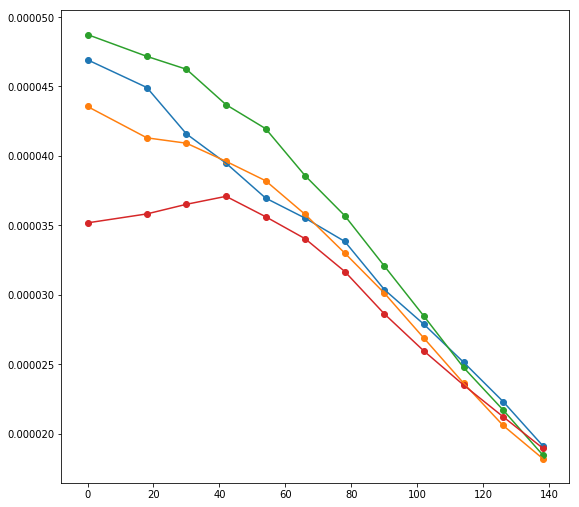

In [3]:
""" convergence """
path_conv = "/home/alex/TP/hse_data/convergence/"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

with open("/home/alex/TP/comet_data/conv_20_60.pkl", "rb") as f:
    conv_d = pickle.load(f)

dists = [28, 56, 84, 112]
sbplts = [421, 422, 423, 424, 425, 426, 427, 428]
fig = plt.figure(figsize=(20, 40))
for d0,d in enumerate(dists):
    with open(os.path.join(path_aux, \
                "gammaRlist"+str(d)+"p00.dat"), "r") as f:
        data_theor = f.readlines()[1:]

    ax = fig.add_subplot(sbplts[2*d0])
    data_theor = [[float(s) for s in k.strip().split(" ")] \
                  for k in data_theor]
    th_x, th_y = np.array([s[0] for s in data_theor]), \
                        np.array([s[1] for s in data_theor])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)

    for r in range(4):
        conv_d[60][d][r][0][0] = 0.
        ax.plot(conv_d[60][d][r][0], conv_d[60][d][r][1])
        ax.scatter(conv_d[60][d][r][0], conv_d[60][d][r][1])
    
    data_mean_numer["x"][d][0] = 0
    ax.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
    
    ax.plot(th_x, th_y, c="b")
    
    interVal = interp1d(th_x, th_y)
    ax2 = ax.twinx()
    ax2.plot(np.array(data_mean_numer["x"][d]), np.abs(data_mean_numer["intensity"][d] - \
                            interVal(np.array(data_mean_numer["x"][d]))))
    ax.legend(["60 seeds, 1st part", " 2st part", " 3rd part", " 4th part", "Mean",\
               "Theoretical"])    
    #else:    
    #    plt.legend(["Theoretical", "60 seeds, 1st part", "60 seeds, 2st part", \
    #               "mean of 120 seeds", "10 seeds"])
    if d0 == 0:
        ax.set_xlim(0, 750)
    else:
        ax.set_xlim(0, 2000)
    ax.grid()
    ax.set_xlabel("r, cm")
    ax.set_ylabel("Intensity")
    ax.set_title(str(d) + " km")
    #plt.show()
    
    ax = fig.add_subplot(sbplts[2*d0+1])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)
    count_c = 0
    for r in range(12):
        count_c += 1
        conv_d[20][d][r][0][0] = 0.
        ax.plot(conv_d[20][d][r][0], conv_d[20][d][r][1])
        ax.scatter(conv_d[20][d][r][0], conv_d[20][d][r][1])

    data_mean_numer["x"][d][0] = 0
    ax.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
        
    ax.plot(th_x, th_y, c='b')
    ax.legend([str(b)+"th 20 seeds" for b in range(1,count_c+1)] + ["Mean", "Theoretical"])
    if d0==0:
        ax.set_xlim(0, 550)
    elif d0<=3:
        ax.set_xlim(0, 1000 * (1 + d0 / 3))
    ax.set_xlabel("r, cm")
    ax.set_ylabel("Intensity")
    ax.set_title(str(d) + " km")
    ax.grid()
    
#plt.savefig("/home/alex/TP/convergence_all_20.png")

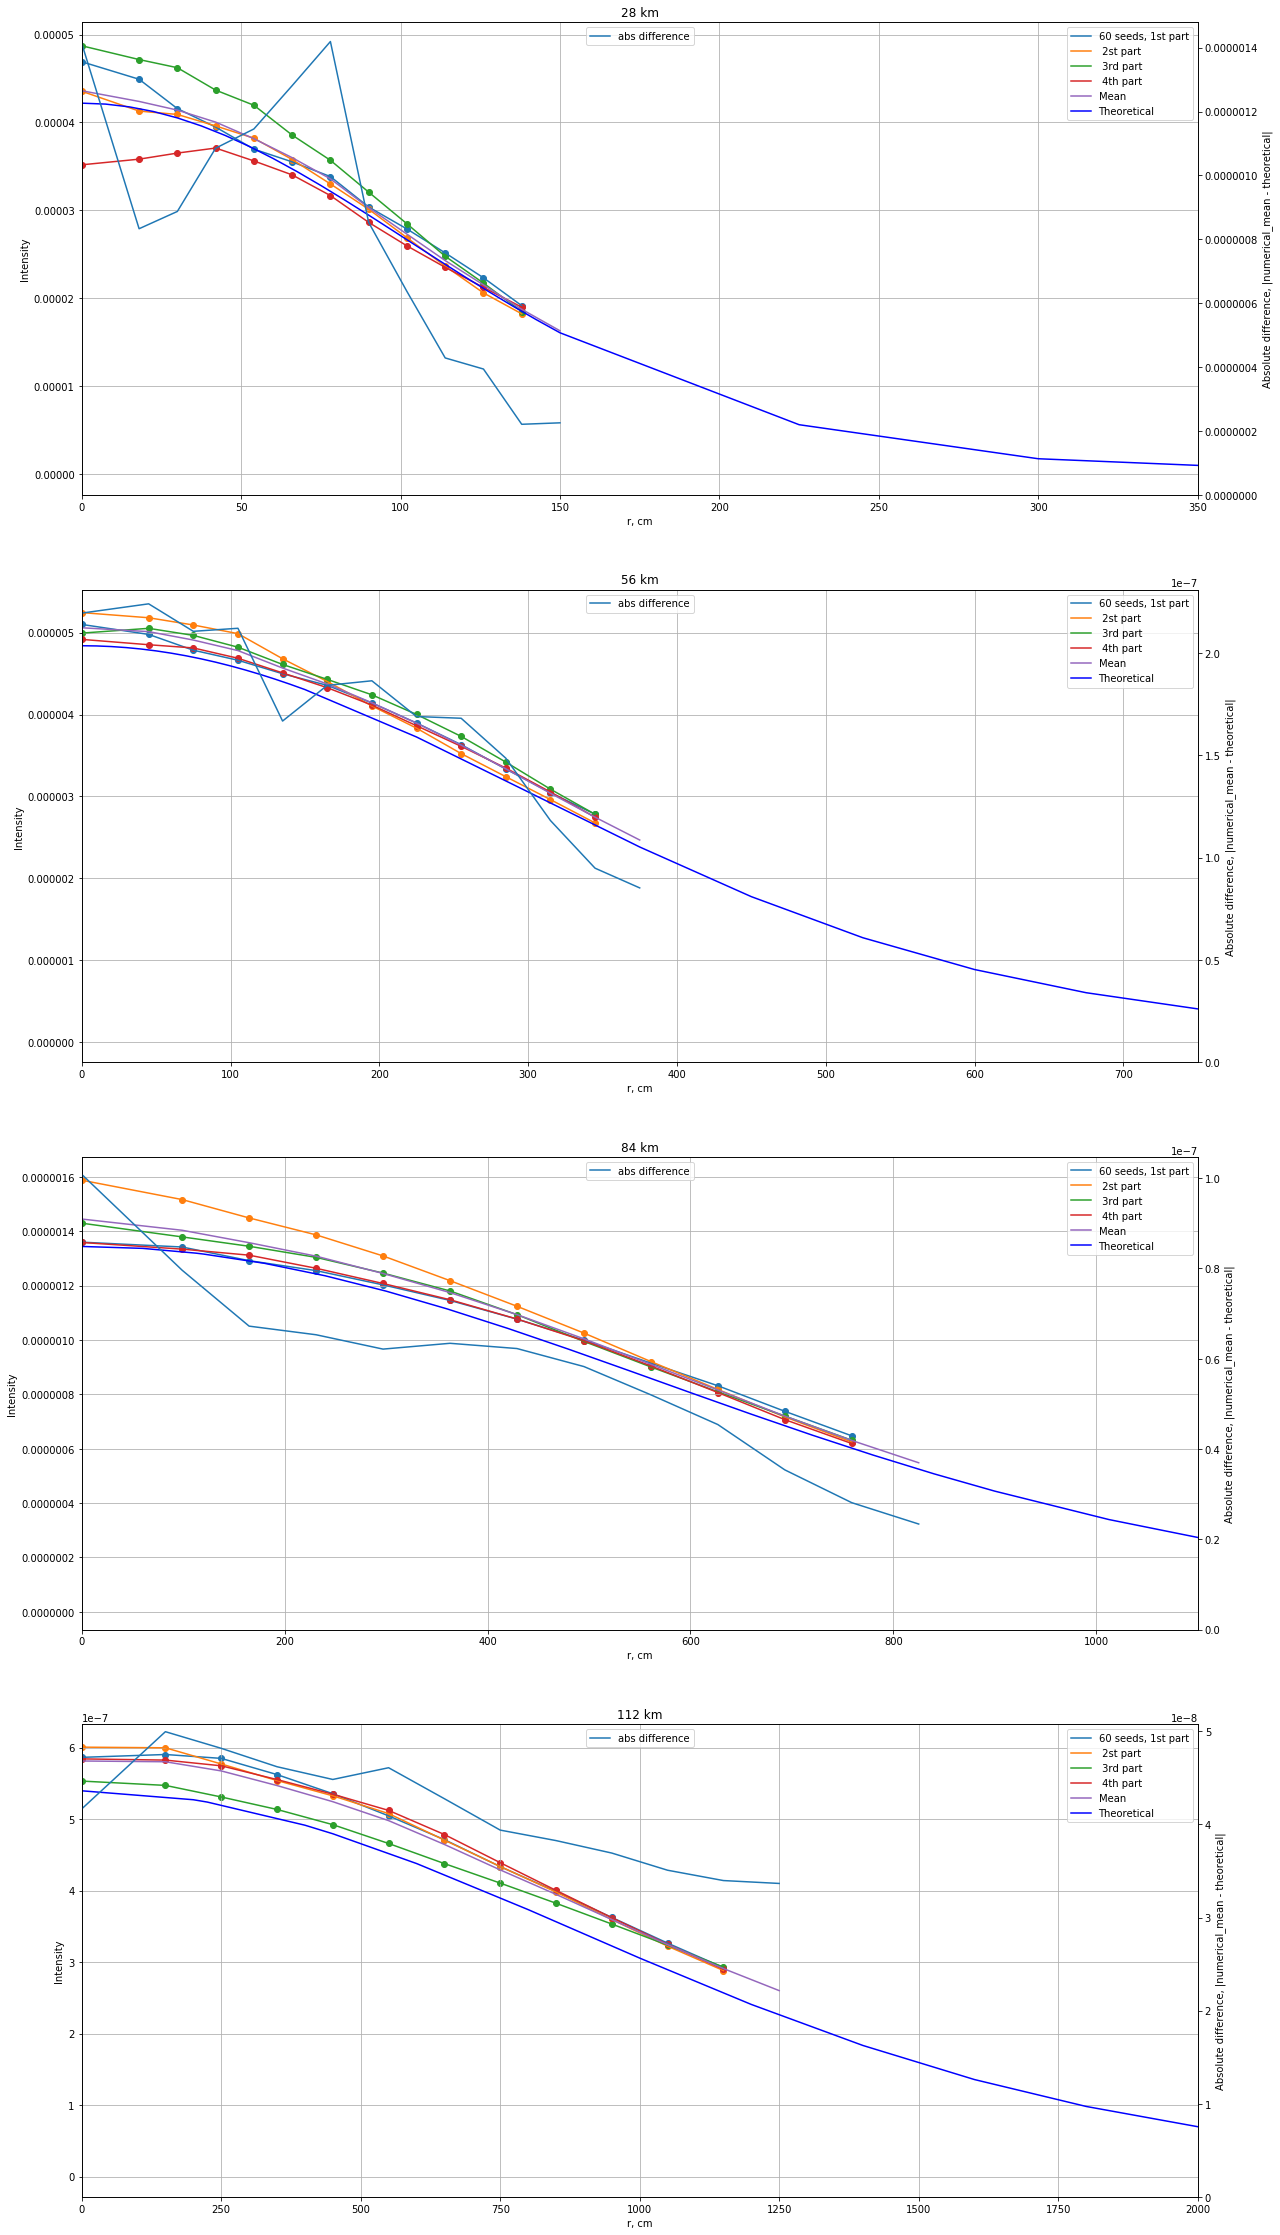

In [9]:
""" convergence """
path_conv = "/home/alex/TP/hse_data/convergence/"
path_aux = "/home/alex/TP/octave_an/data/old/an_data"

with open("/home/alex/TP/comet_data/conv_20_60.pkl", "rb") as f:
    conv_d = pickle.load(f)

dists = [28, 56, 84, 112]
sbplts = [411, 412, 413, 414]
fig = plt.figure(figsize=(20, 40))
for d0,d in enumerate(dists):
    with open(os.path.join(path_aux, \
                "gammaRlist"+str(d)+"p00.dat"), "r") as f:
        data_theor = f.readlines()[1:]

    ax = fig.add_subplot(sbplts[d0])
    data_theor = [[float(s) for s in k.strip().split(" ")] \
                  for k in data_theor]
    th_x, th_y = np.array([s[0] for s in data_theor]), \
                        np.array([s[1] for s in data_theor])
    #plt.plot(th_x, th_y)
    #plt.scatter(th_x, th_y)

    for r in range(4):
        conv_d[60][d][r][0][0] = 0.
        ax.plot(conv_d[60][d][r][0], conv_d[60][d][r][1])
        ax.scatter(conv_d[60][d][r][0], conv_d[60][d][r][1])
    
    data_mean_numer["x"][d][0] = 0
    ax.plot(np.array(data_mean_numer["x"][d]), data_mean_numer["intensity"][d])
    
    ax.plot(th_x, th_y, c="b")
    
    interVal = interp1d(th_x, th_y)
    ax2 = ax.twinx()
    ax2.set_ylabel("Absolute difference, |numerical_mean - theoretical|")
    ax2.plot(np.array(data_mean_numer["x"][d]), np.abs(data_mean_numer["intensity"][d] - \
                            interVal(np.array(data_mean_numer["x"][d]))))# / data_mean_numer["intensity"][d])
    ax2.legend(["abs difference"], loc="upper center")
    ax2.set_ylim(0)
    
    ax.legend(["60 seeds, 1st part", " 2st part", " 3rd part", " 4th part", "Mean",\
               "Theoretical"])    
    #else:    
    #    plt.legend(["Theoretical", "60 seeds, 1st part", "60 seeds, 2st part", \
    #               "mean of 120 seeds", "10 seeds"])
    if d0 == 0:
        ax.set_xlim(0, 350)
    elif d0 == 1:
        ax.set_xlim(0, 750)
    elif d0 ==2:
        ax.set_xlim(0, 1100)
    else:
        ax.set_xlim(0, 2000)
    ax.grid()
    ax.set_xlabel("r, cm")
    ax.set_ylabel("Intensity")
    ax.set_title(str(d) + " km")
    #plt.show()
        
plt.savefig("/home/alex/TP/saveFigures/convergence_per60.png")